<h1 align=center><font size = 10> ASM 2 </font></h1>

# Bài toán

Trong notebook này, chúng ta sẽ thực hành tất cả các thuật toán phân loại mà chúng ta đã học trong khóa này.

Hãy tải tập dữ liệu bằng thư viện Pandas và áp dụng các thuật toán sau rồi tìm ra thuật toán tốt nhất cho tập dữ liệu cụ thể này bằng các phương pháp đánh giá độ chính xác.

Kiểu của tập dữ liệu và bài toán là một phân loại nhị phân có giám sát cổ điển. Với một số yếu tố có các đặc điểm (đặc trưng) nhất định, chúng ta cần xây dựng mô hình ML để xác định những người bị ảnh hưởng bởi bệnh tiểu đường loại 2.

Để giải quyết vấn đề, chúng ta sẽ phải phân tích dữ liệu, thực hiện bất kỳ chuyển đổi và chuẩn hóa cần thiết nào, áp dụng thuật toán học máy, huấn luyện mô hình, kiểm tra chất lượng của mô hình đã huấn luyện và lặp lại với các thuật toán khác cho đến khi tìm ra chất lượng cao nhất cho kiểu của tập dữ liệu.

# Pipeline 

1. Đọc dữ liệu.

3. Trực quan dữ liệu.

4. Tiền xử lý dữ liệu.

5. Xây dựng mô hình phân loại và đánh giá chất lượng.

  - KNN

  - Decision Tree

  - SVM

  - Logistic Regression

  - Neural Network

6. Xây dựng mô hình phân loại bằng Ensemble và đánh giá chất lượng.

  - Soft voting

  - Hard voting

7. Đưa ra kết quả tổng hợp chất lượng mô hình phân loại của tất cả thuật toán.

# Tập dữ liệu

Pima là một tộc người Mỹ bản địa sống ở Arizona. Yếu tố di truyền cho phép nhóm người này có thể tồn tại được với chế độ ăn nghèo carbohydrate trong nhiều năm. Những năm gần đây, do sự chuyển đổi đột ngột từ cây nông nghiệp truyền thống sang thực phẩm chế biến cùng với sự suy giảm hoạt động thể chất đã khiến tỷ lệ mắc bệnh tiểu đường loại 2 cao nhất, cho nên nó trở thành đối tượng của nhiều nghiên cứu.

Tập dữ liệu gồm dữ liệu từ 768 phụ nữ với 8 đặc điểm, cụ thể:

- Số lần mang thai
- Nồng độ đường huyết sau 2 giờ trong xét nghiệm dung nạp glucose đường uống
- Huyết áp tâm trương (mm Hg)
- Độ dày của nếp gấp da (mm)
- Insulin huyết thanh trong 2 giờ (mu U/ml)
- Chỉ số BMI (trọng lượng tính bằng kg/(chiều cao tính bằng m)^2)
- Chức năng phả hệ bệnh tiểu đường
- Tuổi (năm)
- Cột cuối cùng của tập dữ liệu cho biết một người có bị chẩn đoán mắc bệnh tiểu đường (1) hay không (0)

# Thư viện cần thiết

In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

# Load dữ liệu từ file CSV  

### Task 1: Đọc dữ liệu 

Do file không chứa tên cột/đặc trưng, do đó hãy thêm tên cột bằng cách sử dụng mô tả từ trang web tập dữ liệu gốc:

Tên cột lần lượt là: "NumTimesPrg", "PlGlcConc", "BloodP", "SkinThick", "TwoHourSerIns", "BMI", "DiPedFunc", "Age", "HasDiabetes"

In [2]:
# Nhập code của bạn ở đây:
head = ["NumTimesPrg", "PlGlcConc", "BloodP", "SkinThick", "TwoHourSerIns", "BMI", "DiPedFunc", "Age", "HasDiabetes"]
df = pd.read_csv("Data/pima-indians-diabetes.csv", names=head)
df.head()

,NumTimesPrg,PlGlcConc,BloodP,SkinThick,TwoHourSerIns,BMI,DiPedFunc,Age,HasDiabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.describe()

,NumTimesPrg,PlGlcConc,BloodP,SkinThick,TwoHourSerIns,BMI,DiPedFunc,Age,HasDiabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Trực quan hóa và tiền xử lý dữ liệu



## Ma trận tương quan dữ liệu

Ma trận tương quan là một công cụ quan trọng để hiểu mối tương quan giữa các đặc điểm khác nhau. Các giá trị sẽ nằm trong khoảng từ -1 đến 1; giá trị càng gần 1 thì càng có giữa hai đặc điểm càng có mối tương quan tốt.

### Task 2: Tính ma trận tương quan cho tập dữ liệu.

In [4]:
# Nhập code của bạn ở đây:
df_corr = df.corr()
df_corr

,NumTimesPrg,PlGlcConc,BloodP,SkinThick,TwoHourSerIns,BMI,DiPedFunc,Age,HasDiabetes
NumTimesPrg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
PlGlcConc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodP,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThick,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
TwoHourSerIns,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiPedFunc,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
HasDiabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


### Task 3: Trực quan ma trận tương quan bằng heatmap trong seaborn.

<AxesSubplot:>

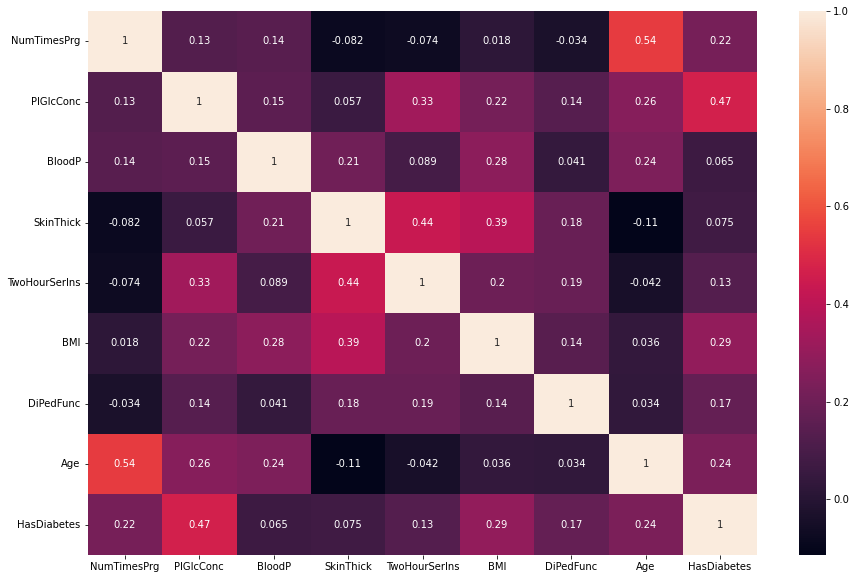

In [5]:
# Nhập code của bạn ở đây:
import seaborn as sns

plt.figure(figsize=(15,10))
sns.heatmap(df_corr, annot=True)

## Trực quan hóa tập dữ liệu

Trực quan hóa dữ liệu là một bước quan trọng của phân tích dữ liệu. Nhờ có trực quan hóa dữ liệu, chúng ta sẽ hiểu rõ hơn về các phân phối giá trị đặc trưng khác nhau: ví dụ: chúng ta nắm được độ tuổi trung bình của mọi người hoặc chỉ số BMI trung bình,...

Tất nhiên, chúng ta có thể giới hạn việc xem xét hiển thị bảng, nhưng điều này cũng đồng nghĩa với việc chúng ta có thể sẽ bỏ lỡ những yếu tố quan trọng có thể ảnh hưởng đến độ chính xác của mô hình.

### Task 4: Trực quan histogram với tất cả cột tập dữ liệu.

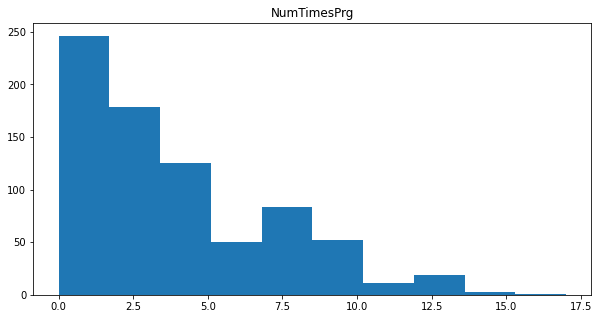

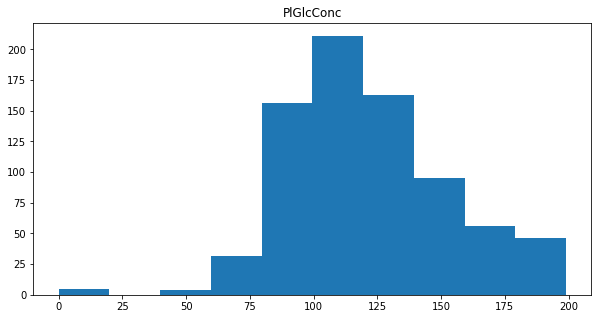

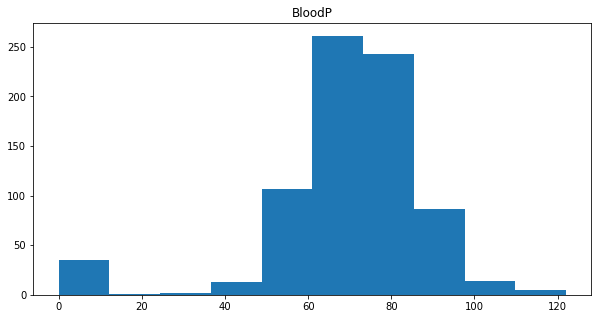

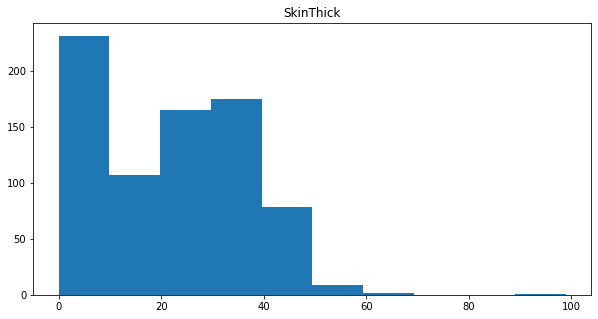

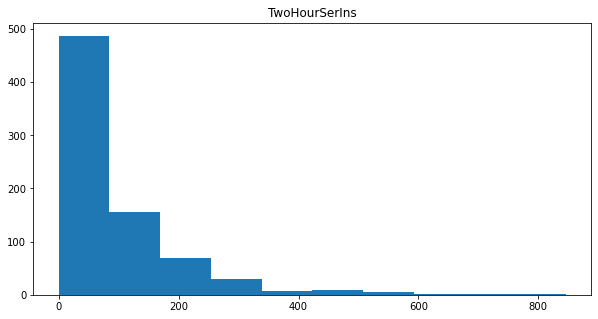

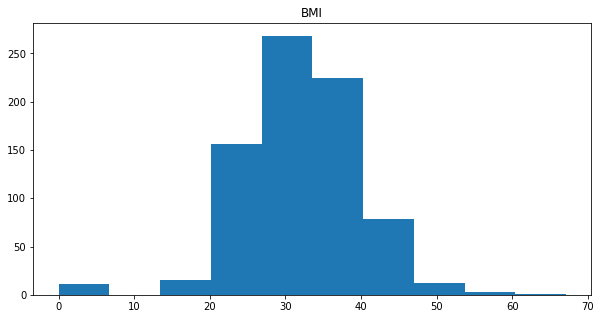

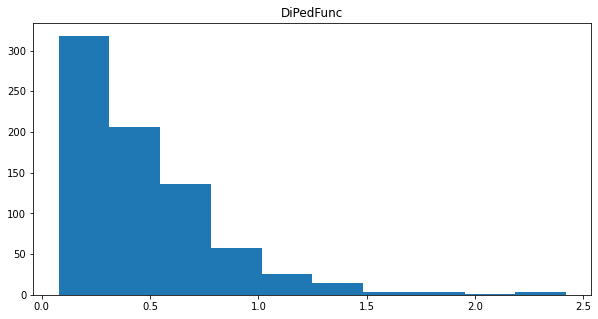

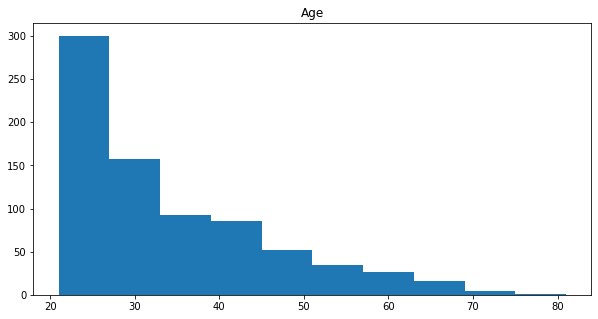

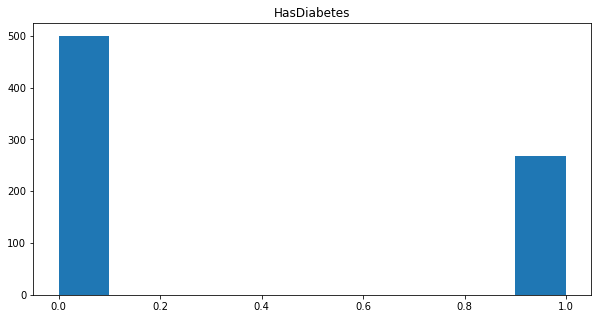

In [6]:
# Nhập code của bạn ở đây:
for item in df.columns:
    plt.figure(figsize=(10,5))
    plt.hist(df[item], bins=10)
    plt.title(item)
    plt.show()

Tôi nhận thấy trong tập dữ liệu (điều này không rõ ràng ngay từ đầu) là thực tế một số người có giá trị null (không) cho một số đặc trưng: BMI hoặc huyết áp không hoàn toàn là 0.

Làm thế nào để xử lý các giá trị tương tự? Hãy xem phần sau trong giai đoạn biến đổi dữ liệu.

## Làm sạch và biến đổi dữ liệu

Từ phân tích trước, chúng ta đã nhận thấy một số bệnh nhân bị thiếu dữ liệu ở một số đặc trưng. Các thuật toán ML hoạt động không hiệu quả khi dữ liệu bị khuyết, vì vậy chúng ta phải tìm cách để "làm sạch" dữ liệu hiện có.
 
Cách dễ nhất là loại bỏ tất cả những bệnh nhân có giá trị null/0, nhưng nếu làm theo cách này, chúng ta cũng sẽ loại bỏ rất nhiều dữ liệu quan trọng.

Cách khác là tính toán giá trị trung bình cho một cột cụ thể và thay thế giá trị đó ở mọi chỗ (trong cùng một cột) có 0 hoặc null. Hãy xem làm thế nào để áp dụng phương pháp thứ hai này.

### Task 5: Gán giá trị bị khuyết trên ['BMI', 'BloodP', 'PlGlcConc', 'SkinThick', 'TwoHourSerIns'] bằng giá trị trung vị hoặc bất kỳ cách nào khác có hiệu quả.

Chúng tôi chưa chuyển đổi tất cả các cột vì một số giá trị có thể là 0 (như "Số lần mang thai").

In [7]:
# Nhập code của bạn ở đây:
list_change = ['BMI', 'BloodP', 'PlGlcConc', 'SkinThick', 'TwoHourSerIns'] 
for item in list_change:
    df[item].replace(0, df[item].median(), inplace=True)

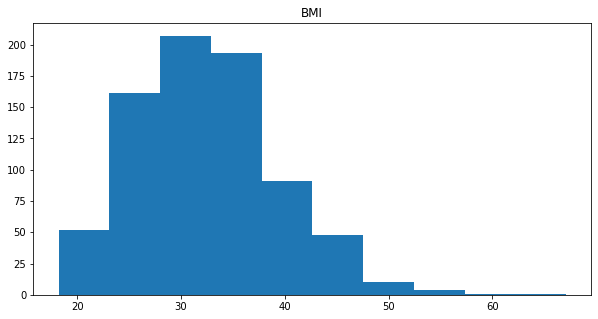

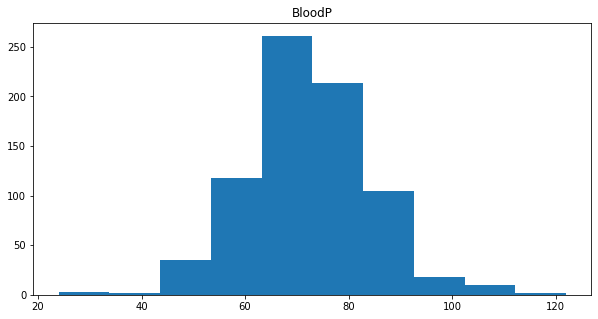

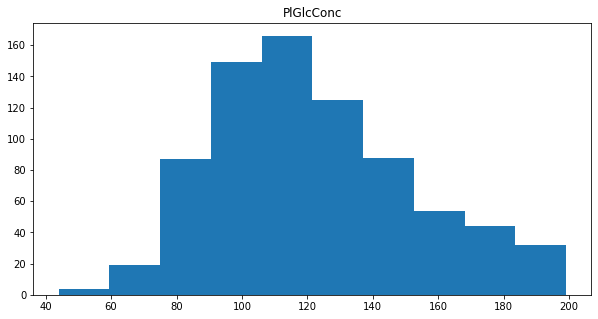

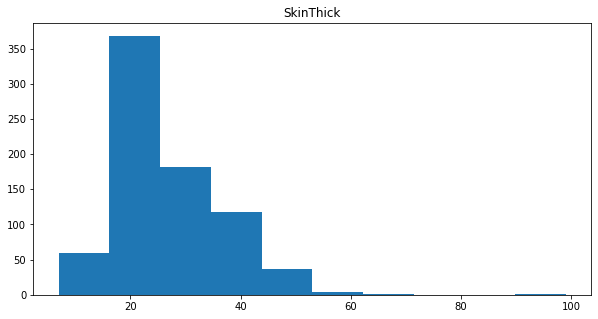

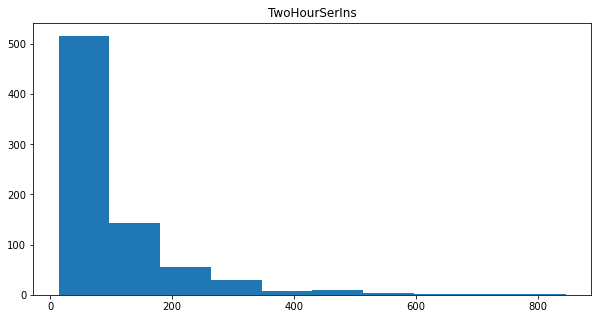

In [8]:
for item in list_change:
    plt.figure(figsize=(10,5))
    plt.hist(df[item], bins=10)
    plt.title(item)
    plt.show()

## Chuẩn hóa dữ liệu

Một trong những cách biến đổi dữ liệu quan trọng nhất mà chúng ta cần áp dụng là co giãn đặc trưng (feature scaling). Về cơ bản, hầu hết các thuật toán ML không hoạt động tốt nếu các đặc trưng có một bộ giá trị khác nhau. Ví dụ trong trường hợp của chúng ta, độ tuổi dao động từ 20 đến 80 tuổi, trong khi số lần bệnh nhân mang thai lại từ 0 đến 17 tuổi. Do đó, chúng ta cần áp dụng một phép biến đổi thích hợp.

### Task 6: Thực hiện co giãn dữ liệu thành giá trị trung bình bằng 0 và phương sai bằng 1.

Lưu ý: Chỉ áp dụng với các đặc trưng, không áp dụng với mục tiêu.

In [9]:
data_X = df[["NumTimesPrg", "PlGlcConc", "BloodP", "SkinThick", "TwoHourSerIns", "BMI", "DiPedFunc", "Age"]]
data_Y = df["HasDiabetes"]

In [10]:
# Nhập code của bạn ở đây:
scale = preprocessing.StandardScaler().fit(data_X)
X_scale = scale.transform(data_X)

In [11]:
X_scale

array([[ 0.63994726,  0.86604475, -0.03198993, ...,  0.16724016,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20506583, -0.5283186 , ..., -0.85155088,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.01666174, -0.69376149, ..., -1.33183808,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.02157407, -0.03198993, ..., -0.90976751,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14279979, -1.02464727, ..., -0.34215536,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94206766, -0.19743282, ..., -0.29849289,
        -0.47378505, -0.87137393]])

## Phân tách dữ liệu

Bây giờ dữ liệu đã được chuyển đổi, chúng ta cần chia tập dữ liệu thành hai phần: tập dữ liệu huấn luyện và tập dữ liệu kiểm tra. Phân tách tập dữ liệu là một bước rất quan trọng đối với các mô hình học máy có giám sát. Về cơ bản, chúng ta sẽ sử dụng phần đầu tiên để huấn luyện mô hình (bỏ qua cột có nhãn được gán trước), sau đó sử dụng mô hình đã huấn luyện để đưa ra dự đoán về dữ liệu mới (là tập dữ liệu kiểm tra, không phải là một phần của tập huấn luyện) và so sánh giá trị dự đoán với nhãn đã được chỉ định.

### Task 7: Tách tập dữ liệu train/test data

- test site = 20%
- random_state=7.

In [12]:
# Nhập code của bạn ở đây:
from sklearn.model_selection import train_test_split

# Nhập code của bạn ở đây
X_train, X_test, y_train, y_test = train_test_split(X_scale, data_Y, test_size=0.2, random_state=7)

**Câu hỏi: Tại sao chúng ta nên thực hiện chuẩn hóa và phân tách dữ liệu trước bước huấn luyện?**

Đáp án: Về cơ bản, hầu hết các thuật toán ML không hoạt động tốt nếu các đặc trưng có một bộ giá trị khác nhau. Ví dụ trong trường hợp của chúng ta, độ tuổi dao động từ 20 đến 80 tuổi, trong khi số lần bệnh nhân mang thai lại từ 0 đến 17 tuổi. Do đó, chúng ta cần chuẩn hóa bộ dữ liệu trước khi huấn luyện

### Task 8: In ra tỷ lệ dương tính trên tổng số phụ nữ mắc bệnh tiểu đường trong tập dữ liệu đầy đủ, tập huấn luyện và tập kiểm tra.

In [13]:
# Nhập code của bạn ở đây:
count_train = 0
count_test = 0
count_data = 0

for item in y_train:
    if(item == 1):
        count_train += 1
        
for item in y_test:
    if(item == 1):
        count_test += 1
        
for item in df['HasDiabetes']:
    if(item == 1):
        count_data += 1
        
print("Tỉ lệ dương tính trên tổng số phụ nữ mắc bệnh tiểu đường trong tập dữ liệu đầy đủ là: ", round(count_data/len(df['HasDiabetes'])*100,2))
print("Tỉ lệ dương tính trên tổng số phụ nữ mắc bệnh tiểu đường trong tập huấn luyên là: ", round(count_train/len(y_train)*100,2))
print("Tỉ lệ dương tính trên tổng số phụ nữ mắc bệnh tiểu đường trong tập kiểm tra là: ", round(count_test/len(y_test)*100,2))

Tỉ lệ dương tính trên tổng số phụ nữ mắc bệnh tiểu đường trong tập dữ liệu đầy đủ là:  34.9
Tỉ lệ dương tính trên tổng số phụ nữ mắc bệnh tiểu đường trong tập huấn luyên là:  34.36
Tỉ lệ dương tính trên tổng số phụ nữ mắc bệnh tiểu đường trong tập kiểm tra là:  37.01


# Phân loại 

Giờ đến lượt bạn rồi, hãy sử dụng tập huấn luyện để xây dựng một mô hình chính xác, sau đó sử dụng tập kiểm tra để báo lại độ chính xác của mô hình.

Bạn nên sử dụng các thuật toán sau:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression
- Neural Network
- Soft voting
- Hard voting



**__ Lưu ý:__**

- Bạn phải cố gắng **TINH CHỈNH ÍT NHẤT 3 SIÊU THAM SỐ** trên mỗi thuật toán, ngoại trừ soft voting và hard voting.
- Bạn có thể lên phía trên notebook và thay đổi quá trình tiền xử lý, lựa chọn đặc trưng, trích xuất đặc trưng,... để tạo ra mô hình tốt hơn.
- Bạn nên sử dụng thư viện scikit-learn, Scipy hoặc Numpy để phát triển các thuật toán phân loại.
- Bạn nên bao gồm code của thuật toán trong các cell sau.

## Import các phép đo đánh giá

In [14]:
from sklearn.metrics import jaccard_score, f1_score

In [15]:
# Dictionary để giữ tất cả score của bộ phân loại
f1_scores = {'train':{'KNN': 0, 'DT': 0, 'SVM': 0, 'LR': 0, 'NN': 0, 'EN_HARD': 0, 'EN_SOFT': 0},
             'test':{'KNN': 0, 'DT': 0, 'SVM': 0, 'LR': 0, 'NN': 0, 'EN_HARD': 0, 'EN_SOFT': 0}}
jaccard_scores = {'train':{'KNN': 0, 'DT': 0, 'SVM': 0, 'LR': 0, 'NN': 0, 'EN_HARD': 0, 'EN_SOFT': 0}, 
                  'test':{'KNN': 0, 'DT': 0, 'SVM': 0, 'LR': 0, 'NN': 0, 'EN_HARD': 0, 'EN_SOFT': 0}}


## Task 9: K Nearest Neighbor(KNN)

Tinh chỉnh siêu tham số để có được mô hình KNN với độ chính xác tốt nhất. 

In ra các giá trị siêu tham số của mô hình KNN với độ chính xác tốt nhất. 

Đưa ra dự đoán từ dữ liệu huấn luyện và kiếm tra trên mô hình KNN. 

Tính f1 score và Jaccard score rồi lưu vào f1_scores dict và jaccard_scores dict.

Yêu cầu:

- Số lượng siêu tham số tối thiểu: 3

- Số lượng giá trị siêu tham số tối đa trong một lần tìm kiếm: 20

- Sử dụng GridSearchCV trong sklearn.model_selection.

- Không nên sử dụng dữ liệu kiểm tra để tìm ra các tham số tốt nhất.

- F1 score trên dữ liệu kiểm tra phải cao hơn **0.6**, Jaccard score phải cao hơn **0.4**.

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [17]:
KNN = KNeighborsClassifier()
KNN.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [18]:
knn_params = [{'n_neighbors': [1,2,3,4,5,6,7,8,9,10],
         'weights': ['uniform', 'distance'],
         'leaf_size': [15, 20,25,30]}]

In [19]:
gs_knn = GridSearchCV(KNN,
                      param_grid=knn_params,
                      scoring='accuracy')

In [20]:
gs_knn.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid=[{'leaf_size': [15, 20, 25, 30],
                          'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'weights': ['uniform', 'distance']}],
             scoring='accuracy')

In [21]:
yhat_test = gs_knn.predict(X_test)
yhat_train = gs_knn.predict(X_train)

In [22]:
print(metrics.classification_report(y_test, yhat_test))
print(metrics.classification_report(y_train, yhat_train))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83        97
           1       0.74      0.61      0.67        57

    accuracy                           0.78       154
   macro avg       0.77      0.75      0.75       154
weighted avg       0.78      0.78      0.77       154

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       403
           1       0.75      0.62      0.68       211

    accuracy                           0.80       614
   macro avg       0.79      0.76      0.77       614
weighted avg       0.80      0.80      0.79       614



In [23]:
print("KNN F1 score train: ", f1_score(y_train, yhat_train))
print("KNN Jaccard score train: ", jaccard_score(y_train, yhat_train))
print("KNN F1 score test: ", f1_score(y_test, yhat_test))
print("KNN Jaccard score test: ", jaccard_score(y_test, yhat_test))

KNN F1 score train:  0.6805194805194805
KNN Jaccard score train:  0.515748031496063
KNN F1 score test:  0.673076923076923
KNN Jaccard score test:  0.5072463768115942


In [24]:
f1_scores['train']['KNN'] = round(f1_score(y_train, yhat_train),3)
jaccard_scores['train']['KNN'] = round(jaccard_score(y_train, yhat_train),3)
f1_scores['test']['KNN'] = round(f1_score(y_test, yhat_test),3)
jaccard_scores['test']['KNN'] = round(jaccard_score(y_test, yhat_test),3)

**Câu hỏi: Diễn giải các tham số bạn đã chọn để tinh chỉnh trong thuật toán KNN.**

In [25]:
gs_knn.best_params_

{'leaf_size': 15, 'n_neighbors': 7, 'weights': 'uniform'}

**Trả lời:**
- `n_neighbors` : Number of neighbors to use by default for kneighbors queries.
- `weights` : Weight function used in prediction. Possible values:
    - `uniform` : uniform weights. All points in each neighborhood are weighted equally.
    - `distance` : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.
- `leaf_size` : Leaf size passed to BallTree or KDTree. This can affect the speed of the construction and query, as well as the memory required to store the tree. The optimal value depends on the nature of the problem.

## Task 10: Decision Tree

Tinh chỉnh siêu tham số để có được mô hình DT với độ chính xác tốt nhất. 

In ra các giá trị siêu tham số của mô hình DT với độ chính xác tốt nhất.

Đưa ra dự đoán từ dữ liệu huấn luyện và kiếm tra trên mô hình DT. 

Tính f1 score và Jaccard score rồi lưu vào f1_scores dict và jaccard_scores dict.

Yêu cầu:

- Số lượng siêu tham số tối thiểu: 3

- Số lượng giá trị siêu tham số tối đa trong một lần tìm kiếm: 20

- Sử dụng GridSearchCV trong sklearn.model_selection.

- Không nên sử dụng dữ liệu kiểm tra để tìm ra các tham số tốt nhất.

- F1 score trên dữ liệu kiểm tra phải cao hơn **0.6**, Jaccard score phải cao hơn **0.4**.

In [26]:
from sklearn import tree

In [27]:
TREE = tree.DecisionTreeClassifier()
TREE.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

In [28]:
tree_params = {'criterion':['gini','entropy'],
               'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}

In [29]:
gs_tree = GridSearchCV(estimator=TREE,
                      param_grid=tree_params,
                      cv=5)

In [30]:
gs_tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30,
                                       40, 50, 70, 90, 120, 150]})

In [31]:
yhat_train = gs_tree.predict(X_train)
yhat_test = gs_tree.predict(X_test)

In [32]:
print(metrics.classification_report(y_train, yhat_train))
print(metrics.classification_report(y_test, yhat_test))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       403
           1       0.78      0.77      0.77       211

    accuracy                           0.84       614
   macro avg       0.83      0.83      0.83       614
weighted avg       0.84      0.84      0.84       614

              precision    recall  f1-score   support

           0       0.82      0.81      0.82        97
           1       0.69      0.70      0.70        57

    accuracy                           0.77       154
   macro avg       0.76      0.76      0.76       154
weighted avg       0.77      0.77      0.77       154



In [33]:
print("Decision Tree F1 score train: ", f1_score(y_train, yhat_train))
print("Decision Tree Jaccard score train: ", jaccard_score(y_train, yhat_train))
print("Decision Tree F1 score test: ", f1_score(y_test, yhat_test))
print("Decision Tree Jaccard score test: ", jaccard_score(y_test, yhat_test))

Decision Tree F1 score train:  0.7714285714285715
Decision Tree Jaccard score train:  0.627906976744186
Decision Tree F1 score test:  0.6956521739130435
Decision Tree Jaccard score test:  0.5333333333333333


In [34]:
f1_scores['train']['DT'] = round(f1_score(y_train, yhat_train),3)
jaccard_scores['train']['DT'] = round(jaccard_score(y_train, yhat_train),3)
f1_scores['test']['DT'] = round(f1_score(y_test, yhat_test),3)
jaccard_scores['test']['DT'] = round(jaccard_score(y_test, yhat_test),3)

**Câu hỏi: Diễn giải các tham số bạn đã chọn để tinh chỉnh trong thuật toán DT.**

In [35]:
gs_tree.best_params_

{'criterion': 'gini', 'max_depth': 5}

Đáp án:

- `criterion` **({“gini”, “entropy”, “log_loss”}, default=”gini”)** : The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “log_loss” and “entropy” both for the Shannon information gain
- `max_depth` **(int, default=None)** : The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

## Task 11: Support Vector Machine

Tinh chỉnh siêu tham số để có được mô hình SVM với độ chính xác tốt nhất. 

In ra các giá trị siêu tham số của mô hình SVM với độ chính xác tốt nhất.

Đưa ra dự đoán từ dữ liệu huấn luyện và kiếm tra trên mô hình SVM. 

Tính f1 score và Jaccard score rồi lưu vào f1_scores dict và jaccard_scores dict.

Yêu cầu:

- Số lượng siêu tham số tối thiểu: 3

- Số lượng giá trị siêu tham số tối đa trong một lần tìm kiếm: 20

- Sử dụng GridSearchCV trong sklearn.model_selection.

- Không nên sử dụng dữ liệu kiểm tra để tìm ra các tham số tốt nhất.

- F1 score trên dữ liệu kiểm tra phải cao hơn **0.6**, Jaccard score phải cao hơn **0.4**.

In [36]:
from sklearn.svm import SVC

In [37]:
SVM = SVC()
SVM.get_params().keys()

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

In [38]:
svm_param = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

In [39]:
gs_svm = GridSearchCV(estimator=SVM,
                      param_grid=svm_param)

In [40]:
gs_svm.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

In [41]:
yhat_train = gs_svm.predict(X_train)
yhat_test = gs_svm.predict(X_test)

In [42]:
print(metrics.classification_report(y_train, yhat_train))
print(metrics.classification_report(y_test, yhat_test))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       403
           1       0.75      0.52      0.61       211

    accuracy                           0.78       614
   macro avg       0.77      0.71      0.73       614
weighted avg       0.77      0.78      0.76       614

              precision    recall  f1-score   support

           0       0.78      0.94      0.85        97
           1       0.84      0.56      0.67        57

    accuracy                           0.80       154
   macro avg       0.81      0.75      0.76       154
weighted avg       0.81      0.80      0.79       154



In [43]:
print("SVM F1 score train: ", f1_score(y_train, yhat_train))
print("SVM Jaccard score train: ", jaccard_score(y_train, yhat_train))
print("SVM F1 score test: ", f1_score(y_test, yhat_test))
print("SVM Jaccard score test: ", jaccard_score(y_test, yhat_test))

SVM F1 score train:  0.6145251396648045
SVM Jaccard score train:  0.4435483870967742
SVM F1 score test:  0.6736842105263158
SVM Jaccard score test:  0.5079365079365079


In [44]:
f1_scores['train']['SVM'] = round(f1_score(y_train, yhat_train),3)
jaccard_scores['train']['SVM'] = round(jaccard_score(y_train, yhat_train),3)
f1_scores['test']['SVM'] = round(f1_score(y_test, yhat_test),3)
jaccard_scores['test']['SVM'] = round(jaccard_score(y_test, yhat_test),3)

**Câu hỏi: Diễn giải các tham số bạn đã chọn để tinh chỉnh trong thuật toán SVM.**

In [45]:
gs_svm.best_params_

{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}

Đáp án:

- `C` **(float, default=1.0)** : Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.
- `gamma` **({‘scale’, ‘auto’} or float, default=’scale’)** : Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.
    - if gamma='scale' (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,
    - if ‘auto’, uses 1 / n_features.

- `kernel` **({‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’} or callable, default=’rbf’)** : Specifies the kernel type to be used in the algorithm. If none is given, ‘rbf’ will be used. If a callable is given it is used to pre-compute the kernel matrix from data matrices; that matrix should be an array of shape (n_samples, n_samples).

## Task 12: Logistic Regression

Tinh chỉnh siêu tham số để có được mô hình LR với độ chính xác tốt nhất. 

In ra các giá trị siêu tham số của mô hình LR với độ chính xác tốt nhất.

Đưa ra dự đoán từ dữ liệu huấn luyện và kiếm tra trên mô hình LR. 

Tính f1 score và Jaccard score rồi lưu vào f1_scores dict và jaccard_scores dict.

Yêu cầu:

- Số lượng siêu tham số tối thiểu: 3

- Số lượng giá trị siêu tham số tối đa trong một lần tìm kiếm: 20

- Sử dụng GridSearchCV trong sklearn.model_selection.

- Không nên sử dụng dữ liệu kiểm tra để tìm ra các tham số tốt nhất.

- F1 score trên dữ liệu kiểm tra phải cao hơn **0.6**, Jaccard score phải cao hơn **0.4**.

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
LR = LogisticRegression()
LR.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [48]:
logistic_param = {'penalty':['l1','l2','elasticnet'], 
                  'C': np.logspace(-3,3,7),
                  'solver':['newton-cg', 'lbfgs', 'liblinear']}

In [49]:
gs_logistic = GridSearchCV(estimator=LR,
                           param_grid=logistic_param,
                           scoring='accuracy',
                           cv=10)

In [50]:
gs_logistic.fit(X_train, y_train)

/Users/junnie/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/junnie/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/junnie/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/junnie/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/junnie

/Users/junnie/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/junnie/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/junnie/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/junnie/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/User

/Users/junnie/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/junnie/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/junnie/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/junnie/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/User

/Users/junnie/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/junnie/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/junnie/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/junnie/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/User

/Users/junnie/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/junnie/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/junnie/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/junnie/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/User

/Users/junnie/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/junnie/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/junnie/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/junnie/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/User

/Users/junnie/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/junnie/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/junnie/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/junnie/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/User

/Users/junnie/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/junnie/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/junnie/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/junnie/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/User

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [51]:
yhat_train = gs_logistic.predict(X_train)
yhat_test = gs_logistic.predict(X_test)

In [52]:
print(metrics.classification_report(y_train, yhat_train))
print(metrics.classification_report(y_test, yhat_test))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       403
           1       0.73      0.56      0.64       211

    accuracy                           0.78       614
   macro avg       0.76      0.73      0.74       614
weighted avg       0.77      0.78      0.77       614

              precision    recall  f1-score   support

           0       0.78      0.90      0.83        97
           1       0.76      0.56      0.65        57

    accuracy                           0.77       154
   macro avg       0.77      0.73      0.74       154
weighted avg       0.77      0.77      0.76       154



In [53]:
print("Logistic Regression F1 score train: ", f1_score(y_train, yhat_train))
print("Logistic Regression Jaccard score train: ", jaccard_score(y_train, yhat_train))
print("Logistic Regression F1 score test: ", f1_score(y_test, yhat_test))
print("Logistic Regression Jaccard score test: ", jaccard_score(y_test, yhat_test))

Logistic Regression F1 score train:  0.6363636363636364
Logistic Regression Jaccard score train:  0.4666666666666667
Logistic Regression F1 score test:  0.6464646464646465
Logistic Regression Jaccard score test:  0.47761194029850745


In [54]:
f1_scores['train']['LR'] = round(f1_score(y_train, yhat_train),3)
jaccard_scores['train']['LR'] = round(jaccard_score(y_train, yhat_train),3)
f1_scores['test']['LR'] = round(f1_score(y_test, yhat_test),3)
jaccard_scores['test']['LR'] = round(jaccard_score(y_test, yhat_test),3)

**Câu hỏi: Diễn giải các tham số bạn đã chọn để tinh chỉnh trong thuật toán LR.**

In [55]:
gs_logistic.best_params_

{'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}

Đáp án:

- `C` **(float, default=1.0)** : Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.
- `penalty` **({‘l1’, ‘l2’, ‘elasticnet’, ‘none’}, default=’l2’)** : Specify the norm of the penalty:
    - 'none': no penalty is added;
    - 'l2': add a L2 penalty term and it is the default choice;
    - 'l1': add a L1 penalty term;
    - 'elasticnet': both L1 and L2 penalty terms are added.
- `solver` **({‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’)** : Algorithm to use in the optimization problem. Default is ‘lbfgs’. To choose a solver, you might want to consider the following aspects:
    - For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones;
    - For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss;
    - ‘liblinear’ is limited to one-versus-rest schemes.


## Task 13: Neural Network

Tinh chỉnh siêu tham số để có được mô hình NN với độ chính xác tốt nhất. 

In ra các giá trị siêu tham số của mô hình NN với độ chính xác tốt nhất.

Đưa ra dự đoán từ dữ liệu huấn luyện và kiếm tra trên mô hình NN. 

Tính f1 score và Jaccard score rồi lưu vào f1_scores dict và jaccard_scores dict.

Yêu cầu:

- Số lượng siêu tham số tối thiểu: 3

- Số lượng giá trị siêu tham số tối đa trong một lần tìm kiếm: 20

- Sử dụng GridSearchCV trong sklearn.model_selection.

- Không nên sử dụng dữ liệu kiểm tra để tìm ra các tham số tốt nhất.

- F1 score trên dữ liệu kiểm tra phải cao hơn **0.6**, Jaccard score phải cao hơn **0.4**.

In [56]:
from sklearn.neural_network import MLPClassifier

In [57]:
NN = MLPClassifier()
NN.get_params().keys()

dict_keys(['activation', 'alpha', 'batch_size', 'beta_1', 'beta_2', 'early_stopping', 'epsilon', 'hidden_layer_sizes', 'learning_rate', 'learning_rate_init', 'max_fun', 'max_iter', 'momentum', 'n_iter_no_change', 'nesterovs_momentum', 'power_t', 'random_state', 'shuffle', 'solver', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [58]:
neural_param = {'max_iter': [500,1000,1500],
                'alpha': 10.0 ** -np.arange(1, 7),
                'hidden_layer_sizes':np.arange(1, 12),
                'random_state':[0,1,2,3,4,5,6,7,8,9]}

In [59]:
gs_nn = GridSearchCV(estimator=NN,
                     param_grid=neural_param,
                     scoring='accuracy',
                     n_jobs= -1,
                     cv=5)

In [60]:
gs_nn.fit(X_train, y_train)

/Users/junnie/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/junnie/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/junnie/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/junnie/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/junnie/opt/an

/Users/junnie/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/junnie/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/junnie/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/junnie/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/junnie/opt/an

/Users/junnie/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/junnie/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/junnie/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/junnie/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/junnie/opt/an

/Users/junnie/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/junnie/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/junnie/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/junnie/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/junnie/opt/an

/Users/junnie/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/junnie/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/junnie/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/junnie/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/junnie/opt/an

/Users/junnie/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/junnie/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/junnie/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/junnie/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/junnie/opt/a

/Users/junnie/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/junnie/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/junnie/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/junnie/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/junnie/opt/an

/Users/junnie/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/junnie/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/junnie/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/junnie/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/junnie/opt/an

/Users/junnie/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/junnie/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/junnie/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/junnie/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/junnie/opt/an

/Users/junnie/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/junnie/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/junnie/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/junnie/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/junnie/opt/an

/Users/junnie/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/junnie/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/junnie/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/junnie/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/junnie/opt/an

/Users/junnie/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/junnie/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/junnie/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/junnie/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/junnie/opt/an

/Users/junnie/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/junnie/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/junnie/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/junnie/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/junnie/opt/an

/Users/junnie/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/junnie/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/junnie/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/junnie/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/junnie/op

/Users/junnie/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/junnie/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/junnie/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/junnie/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/junnie/opt/an

/Users/junnie/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/junnie/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/junnie/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/junnie/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/junnie/opt/an

/Users/junnie/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/junnie/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/junnie/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/junnie/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/junnie/opt/an

/Users/junnie/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/junnie/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/junnie/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/junnie/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/junnie/opt/an

/Users/junnie/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/junnie/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/junnie/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/junnie/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/junnie/opt/an

/Users/junnie/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/junnie/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/junnie/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/junnie/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/junnie/opt/an

/Users/junnie/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/junnie/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/junnie/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/junnie/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/junnie/opt/an

/Users/junnie/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/junnie/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/junnie/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/junnie/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/junnie/opt/an

/Users/junnie/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/junnie/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/junnie/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/junnie/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/junnie/opt/an

/Users/junnie/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/junnie/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/junnie/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/junnie/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/junnie/opt/an

GridSearchCV(cv=5, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'alpha': array([1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06]),
                         'hidden_layer_sizes': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
                         'max_iter': [500, 1000, 1500],
                         'random_state': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]},
             scoring='accuracy')

In [61]:
yhat_train = gs_nn.predict(X_train)
yhat_test = gs_nn.predict(X_test)

In [62]:
print(metrics.classification_report(y_train, yhat_train))
print(metrics.classification_report(y_test, yhat_test))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       403
           1       0.72      0.61      0.66       211

    accuracy                           0.79       614
   macro avg       0.77      0.74      0.75       614
weighted avg       0.78      0.79      0.78       614

              precision    recall  f1-score   support

           0       0.81      0.90      0.85        97
           1       0.78      0.63      0.70        57

    accuracy                           0.80       154
   macro avg       0.79      0.76      0.77       154
weighted avg       0.80      0.80      0.79       154



In [63]:
print("Neural Network F1 score train: ", f1_score(y_train, yhat_train))
print("Neural Network Jaccard score train: ", jaccard_score(y_train, yhat_train))
print("Neural Network F1 score test: ", f1_score(y_test, yhat_test))
print("Neural Network Jaccard score test: ", jaccard_score(y_test, yhat_test))

Neural Network F1 score train:  0.6615384615384615
Neural Network Jaccard score train:  0.4942528735632184
Neural Network F1 score test:  0.6990291262135923
Neural Network Jaccard score test:  0.5373134328358209


In [64]:
f1_scores['train']['NN'] = round(f1_score(y_train, yhat_train),3)
jaccard_scores['train']['NN'] = round(jaccard_score(y_train, yhat_train),3)
f1_scores['test']['NN'] = round(f1_score(y_test, yhat_test),3)
jaccard_scores['test']['NN'] = round(jaccard_score(y_test, yhat_test),3)

**Câu hỏi: Diễn giải các tham số bạn đã chọn để tinh chỉnh trong thuật toán NN.**

In [65]:
gs_nn.best_params_

{'alpha': 0.1, 'hidden_layer_sizes': 11, 'max_iter': 500, 'random_state': 3}

Đáp án:

- `max_iter` **(int, default=200)** : Maximum number of iterations. The solver iterates until convergence (determined by ‘tol’) or this number of iterations. For stochastic solvers (‘sgd’, ‘adam’), note that this determines the number of epochs (how many times each data point will be used), not the number of gradient steps.
- `alpha` **(float, default=0.0001)** : Strength of the L2 regularization term. The L2 regularization term is divided by the sample size when added to the loss.
- `hidden_layer_sizes` **(tuple, length = n_layers - 2, default=(100,))** : The ith element represents the number of neurons in the ith hidden layer.
- `random_state` **(int, RandomState instance, default=None)** : Determines random number generation for weights and bias initialization, train-test split if early stopping is used, and batch sampling when solver=’sgd’ or ‘adam’. Pass an int for reproducible results across multiple function calls

## Task 14: Soft Voting Ensemble 

Điều chỉnh trọng số trong Soft Voting Ensemble để đưa ra kết quả dự đoán tốt nhất.

Đưa ra dự đoán từ dữ liệu huấn luyện và kiếm tra trên mô hình soft voting ensembling model. 

Tính f1 score và Jaccard score rồi lưu vào f1_scores dict và jaccard_scores dict.

Yêu cầu:

- Sử dụng 5 mô hình trên

- Sử dụng cùng một thiết lập cho 5 mô hình như các bước trên.

- F1 score trên dữ liệu kiểm tra phải lớn hơn **0.66**, Jaccard similarity score phải lớn hơn **0.5**.

In [66]:
knn_model = KNeighborsClassifier(leaf_size=15, n_neighbors=7, weights='uniform')
tree_model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)
svm_model = SVC(C=100, gamma=0.0001, kernel='rbf', probability=True)
logistic_model = LogisticRegression(C=1.0, penalty='l2', solver='newton-cg')
nn_model = MLPClassifier(alpha=0.1, hidden_layer_sizes=1, max_iter=500, random_state=3, solver='lbfgs')

In [67]:
from sklearn.ensemble import VotingClassifier

In [68]:
# Nhập code của bạn ở đây:
Soft_Voting = VotingClassifier(estimators=[('knn', knn_model), ('tree', tree_model),
                                           ('svm', svm_model), ('lr', logistic_model),
                                           ('nn', nn_model)],
                               voting='soft')

In [69]:
Soft_Voting.fit(X_train, y_train)

VotingClassifier(estimators=[('knn',
                              KNeighborsClassifier(leaf_size=15,
                                                   n_neighbors=7)),
                             ('tree',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=5)),
                             ('svm',
                              SVC(C=100, gamma=0.0001, probability=True)),
                             ('lr', LogisticRegression(solver='newton-cg')),
                             ('nn',
                              MLPClassifier(alpha=0.1, hidden_layer_sizes=1,
                                            max_iter=500, random_state=3,
                                            solver='lbfgs'))],
                 voting='soft')

In [70]:
yhat_train = Soft_Voting.predict(X_train)
yhat_test = Soft_Voting.predict(X_test)

In [71]:
print(metrics.classification_report(y_train, yhat_train))
print(metrics.classification_report(y_test, yhat_test))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       403
           1       0.77      0.57      0.65       211

    accuracy                           0.79       614
   macro avg       0.79      0.74      0.75       614
weighted avg       0.79      0.79      0.78       614

              precision    recall  f1-score   support

           0       0.80      0.93      0.86        97
           1       0.83      0.60      0.69        57

    accuracy                           0.81       154
   macro avg       0.81      0.76      0.78       154
weighted avg       0.81      0.81      0.80       154



In [72]:
print("Soft Voting F1 score train: ", f1_score(y_train, yhat_train))
print("Soft Voting Jaccard score train: ", jaccard_score(y_train, yhat_train))
print("Soft Voting F1 score test: ", f1_score(y_test, yhat_test))
print("Soft Voting Jaccard score test: ", jaccard_score(y_test, yhat_test))

Soft Voting F1 score train:  0.6539509536784741
Soft Voting Jaccard score train:  0.48582995951417
Soft Voting F1 score test:  0.6938775510204082
Soft Voting Jaccard score test:  0.53125


In [73]:
f1_scores['train']['EN_SOFT'] = round(f1_score(y_train, yhat_train),3)
jaccard_scores['train']['EN_SOFT'] = round(jaccard_score(y_train, yhat_train),3)
f1_scores['test']['EN_SOFT'] = round(f1_score(y_test, yhat_test),3)
jaccard_scores['test']['EN_SOFT'] = round(jaccard_score(y_test, yhat_test),3)

## Task 15: Hard Voting Ensemble 

Điều chỉnh trọng số trong Hard Voting Ensemble để đưa ra kết quả dự đoán tốt nhất.

Đưa ra dự đoán từ dữ liệu huấn luyện và kiếm tra trên mô hình hard voting ensembling model. 

Tính f1 score và Jaccard score rồi lưu vào f1_scores dict và jaccard_scores dict.

Yêu cầu:

- Sử dụng 5 mô hình trên

- Sử dụng cùng một thiết lập cho 5 mô hình như các bước trên.

- F1 score trên dữ liệu kiểm tra phải lớn hơn **0.57**, Jaccard similarity score phải lớn hơn **0.45**.

In [74]:
# Nhập code của bạn ở đây:
Hard_Voting = VotingClassifier(estimators=[('knn', knn_model), ('tree', tree_model),
                                           ('svm', svm_model), ('lr', logistic_model),
                                           ('nn', nn_model)],
                               voting='hard')

In [75]:
Hard_Voting.fit(X_train, y_train)

VotingClassifier(estimators=[('knn',
                              KNeighborsClassifier(leaf_size=15,
                                                   n_neighbors=7)),
                             ('tree',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=5)),
                             ('svm',
                              SVC(C=100, gamma=0.0001, probability=True)),
                             ('lr', LogisticRegression(solver='newton-cg')),
                             ('nn',
                              MLPClassifier(alpha=0.1, hidden_layer_sizes=1,
                                            max_iter=500, random_state=3,
                                            solver='lbfgs'))])

In [76]:
yhat_train = Hard_Voting.predict(X_train)
yhat_test = Hard_Voting.predict(X_test)

In [77]:
print(metrics.classification_report(y_train, yhat_train))
print(metrics.classification_report(y_test, yhat_test))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       403
           1       0.76      0.56      0.64       211

    accuracy                           0.79       614
   macro avg       0.78      0.73      0.75       614
weighted avg       0.78      0.79      0.78       614

              precision    recall  f1-score   support

           0       0.79      0.92      0.85        97
           1       0.80      0.58      0.67        57

    accuracy                           0.79       154
   macro avg       0.80      0.75      0.76       154
weighted avg       0.79      0.79      0.78       154



In [78]:
print("Hard Voting F1 score train: ", f1_score(y_train, yhat_train))
print("Hard Voting Jaccard score train: ", jaccard_score(y_train, yhat_train))
print("Hard Voting F1 score test: ", f1_score(y_test, yhat_test))
print("Hard Voting Jaccard score test: ", jaccard_score(y_test, yhat_test))

Hard Voting F1 score train:  0.6430517711171662
Hard Voting Jaccard score train:  0.4738955823293173
Hard Voting F1 score test:  0.6734693877551021
Hard Voting Jaccard score test:  0.5076923076923077


In [79]:
f1_scores['train']['EN_HARD'] = round(f1_score(y_train, yhat_train),3)
jaccard_scores['train']['EN_HARD'] = round(jaccard_score(y_train, yhat_train),3)
f1_scores['test']['EN_HARD'] = round(f1_score(y_test, yhat_test),3)
jaccard_scores['test']['EN_HARD'] = round(jaccard_score(y_test, yhat_test),3)

# Báo cáo
Bạn có thể tường thuật độ chính xác của mô hình đã xây bằng cách sử dụng các phép đo đánh giá khác nhau:

| Algorithm | Jaccard-training | F1-score-training |Jaccard-testing | F1-score-testing |
|-----------|------------------|-------------------|----------------|------------------|
| KNN | ? | ? |  ? |  ? |
| Decision Tree | ? | ? |  ? |  ? |
| SVM | ? | ? |  ? |  ? |
| Logistic Regression| ? | ? |  ? |  ? |   
| Neural Network| ? | ? |  ? |  ? |
| Hard Voting | ? | ? |  ? |  ? |
| Soft Voting | ? | ? |  ? |  ? |


## Task 16: Tạo data frame mô tả kết quả chính xác như trên.

In [80]:
# Nhập code của bạn ở đâu
a = pd.DataFrame.from_dict(f1_scores)
a. columns = ['F1-score-training', 'F1-score-testing']
b = pd.DataFrame.from_dict(jaccard_scores)
b.columns = ['Jaccard-training','Jaccard-testing']

c = pd.concat([a,b], axis=1)
c.index = ['KNN', 'Decision Tree', 'SVM', 'Logistic Regression', 'Neural Network', 'Hard Voting', 'Soft Voting']

In [81]:
c

,F1-score-training,F1-score-testing,Jaccard-training,Jaccard-testing
KNN,0.681,0.673,0.516,0.507
Decision Tree,0.771,0.696,0.628,0.533
SVM,0.615,0.674,0.444,0.508
Logistic Regression,0.636,0.646,0.467,0.478
Neural Network,0.662,0.699,0.494,0.537
Hard Voting,0.643,0.673,0.474,0.508
Soft Voting,0.654,0.694,0.486,0.531


**Câu hỏi: Có phải các phương pháp ensemble luôn tốt hơn một mô hình đơn lẻ không? Nếu không, hãy giải thích tại sao?**

Trả lời: 

Ensemble Learning là phương pháp tổng hợp kết quả dự đoán của nhiều model thành thành model cuối cùng. Giúp nâng cao tính tổng quát của model Machine Learning. Vì thế các phương pháp ensemble luôn sẽ tốt hơn một mô hình đơn lẻ